In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("D:\\Data sets\\forestfires.csv")

In [4]:
# Coverting the size_category into the integers
data.size_category.replace(("small","large"),(0,1),inplace=True)

In [5]:
x=data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep']].values
y=data.size_category.values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [6]:
# create model
model = Sequential()
model.add(Dense(42, input_shape=(28,), activation = 'relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [7]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Fit the model
history=model.fit(X_train,y_train, validation_split=0.33, epochs=180, batch_size=10)

Epoch 1/180
28/28 [==============================] - 2s 59ms/step - loss: 6.0928 - accuracy: 0.5790 - val_loss: 2.5373 - val_accuracy: 0.6861
Epoch 2/180
28/28 [==============================] - 0s 4ms/step - loss: 2.0015 - accuracy: 0.6102 - val_loss: 1.8467 - val_accuracy: 0.7080
Epoch 3/180
28/28 [==============================] - 0s 4ms/step - loss: 0.9127 - accuracy: 0.7740 - val_loss: 0.7773 - val_accuracy: 0.6496
Epoch 4/180
28/28 [==============================] - 0s 4ms/step - loss: 0.9111 - accuracy: 0.6786 - val_loss: 0.7678 - val_accuracy: 0.7591
Epoch 5/180
28/28 [==============================] - 0s 9ms/step - loss: 0.5682 - accuracy: 0.8201 - val_loss: 2.4319 - val_accuracy: 0.7226
Epoch 6/180
28/28 [==============================] - 0s 4ms/step - loss: 1.0242 - accuracy: 0.7705 - val_loss: 0.7503 - val_accuracy: 0.7810
Epoch 7/180
28/28 [==============================] - 0s 4ms/step - loss: 0.5135 - accuracy: 0.8500 - val_loss: 0.5732 - val_accuracy: 0.7153
Epoch 8/180


In [9]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9758
accuracy: 97.58%


In [10]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 0.9712
accuracy: 97.12%


In [11]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:

model.compile(loss="categorical_crossentropy",
              optimizer='rmsprop', metrics=["accuracy"])

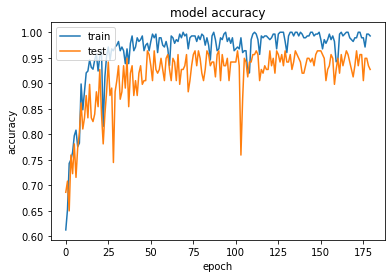

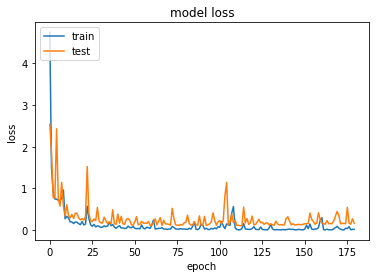

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion:-We have predicted the result with 97% accuracy here epoch=180  